In [53]:
from scipy.stats import norm, binom
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2)

# Домашнее Задание 2. Основные понятия математической статистики

### Семенов Игорь СКБ-172

## 2.1. Моделирование случайных величин

In [226]:
size = {
    0: 5,
    1: 10,
    2: 100,
    3: 1000,
    4: 100000
}
normRandom = []
binRandom = []
for i in range(5):
    binRandom.append([])
    normRandom.append([])
    for _ in range(5):
        binRandom[i].append(binom.rvs(n = 10, p = 0.5, size = size[i]))
        normRandom[i].append(norm.rvs(2, 2, size = size[i])) #первый параметр - матожидание, второй - стандартное отклонение

In [227]:
print("Выборка n=5:", *binRandom[0], sep='\n')

Выборка n=5:
[8 6 3 8 6]
[2 6 6 5 8]
[6 5 4 4 7]
[2 6 5 4 6]
[5 4 0 7 5]


In [228]:
print("Выборка n=10:", *binRandom[1], sep='\n')

Выборка n=10:
[7 5 6 8 7 4 3 8 5 6]
[5 5 6 6 6 5 5 4 6 3]
[6 3 6 6 5 8 5 5 6 3]
[4 4 6 5 6 3 4 1 4 7]
[5 2 5 6 3 5 3 6 5 6]


In [229]:
print("Выборка n=5:", *normRandom[0], sep='\n')

Выборка n=5:
[1.94 2.41 2.78 0.77 1.31]
[-0.75 -0.01  4.83  2.39  2.16]
[-1.01  4.71  0.77  0.83  2.74]
[ 4.04  0.02 -1.71 -0.44  2.63]
[3.3  3.93 1.76 0.91 5.22]


In [230]:
print("Выборка n=10:", *normRandom[1], sep='\n')

Выборка n=10:
[-2.35  1.41  0.61  2.26  3.58  6.06  2.34  4.91 -1.35  3.38]
[ 3.11 -0.25  2.23 -1.   -0.63  1.47  3.36 -0.87  3.12  1.25]
[0.77 1.8  0.72 0.14 1.94 1.84 0.88 3.12 0.77 0.22]
[ 2.8   2.19  0.21  4.42 -1.38  0.95  0.79  1.4   0.97  0.31]
[-0.92  1.96  1.5   0.72  1.71  2.73  4.73  3.93  2.47  1.18]


## 2.2 Построение эмпирической функции распределения

### 2.2.1 Биномиальное распределение $Bi(10,\frac{1}{2})$

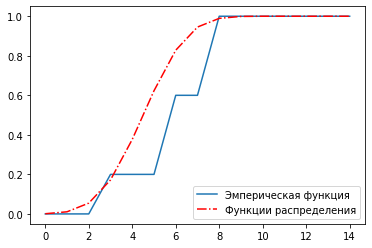

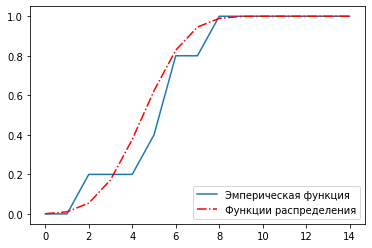

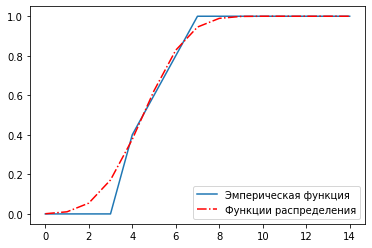

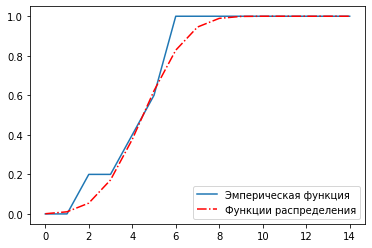

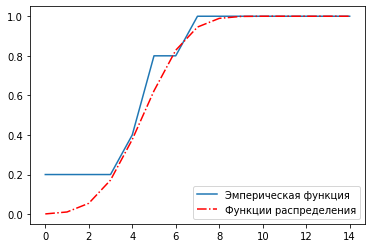

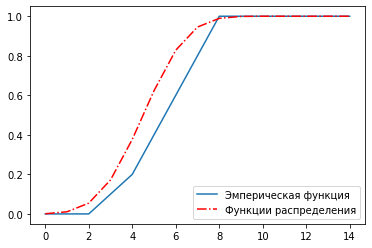

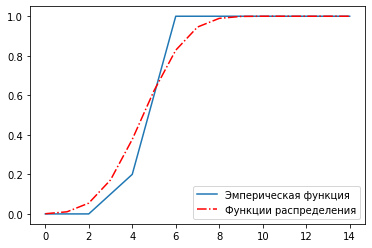

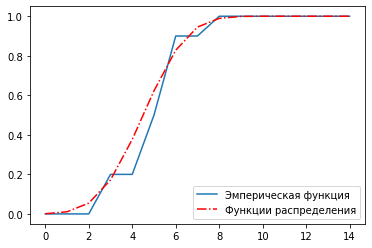

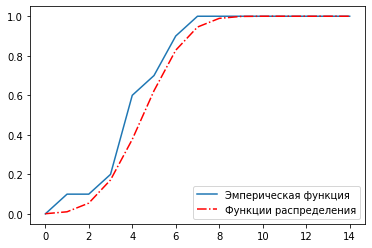

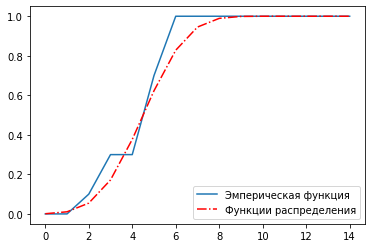

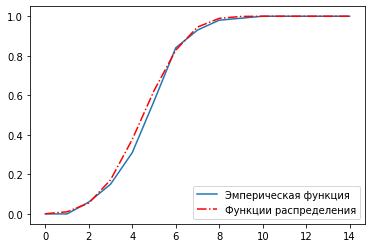

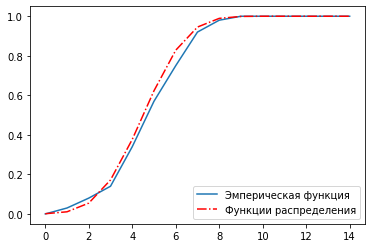

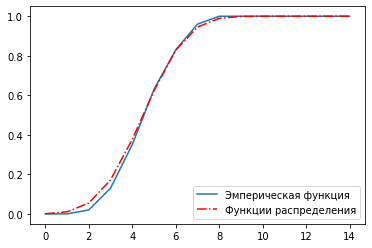

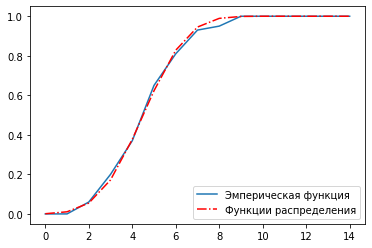

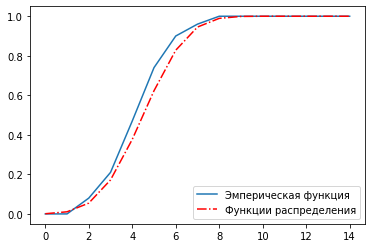

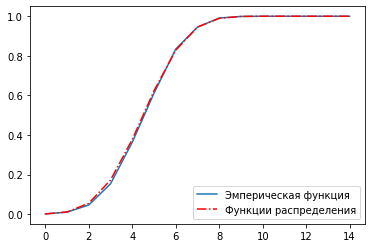

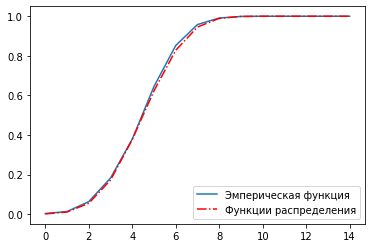

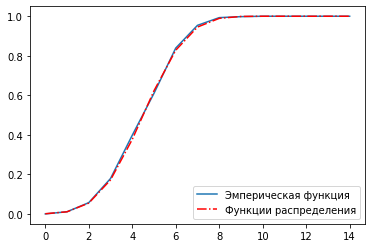

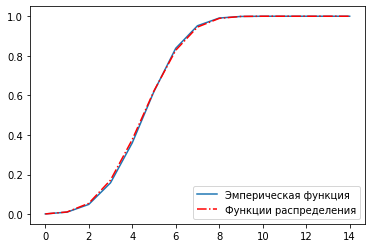

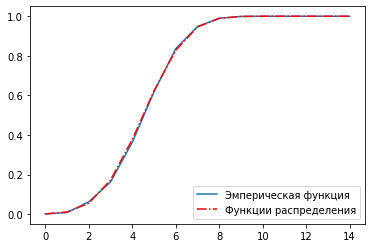

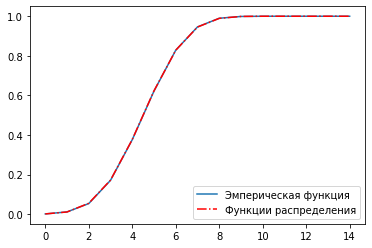

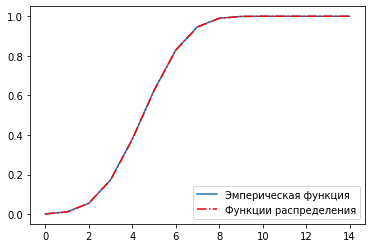

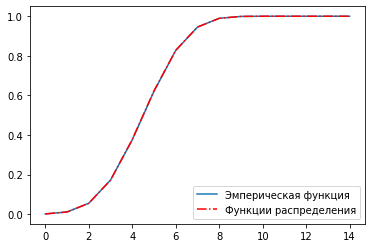

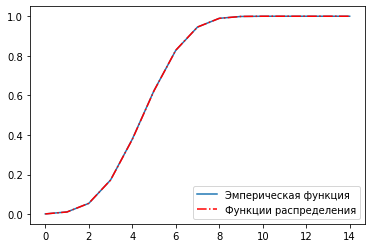

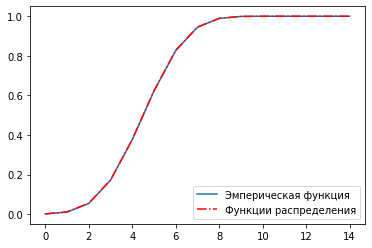

In [231]:
binECDF = []
x = range(15)
for i in binRandom:
    for j in i:
        ecdf = ECDF(j)
        binECDF.append(ecdf(x))
        plt.plot(x, ecdf(x), label='Эмперическая функция')
        plt.plot(x, binom.cdf(x, 10, 0.5), label='Функции распределения', color = 'r', ls = '-.')
        plt.legend()
        plt.show()
binECDF = np.array(binECDF).reshape(5, 5, 15)

In [232]:
binSup = []
for n in binECDF:
    for i in range(len(n)-1):
        for j in range(i+1, len(n)):
            binSup.append(max(abs(n[i] - n[j])))
binSup = np.around(np.array(binSup).reshape(5, 10), decimals=3)
print(binSup)

[[0.2  0.4  0.4  0.6  0.2  0.2  0.4  0.2  0.2  0.2 ]
 [0.4  0.3  0.4  0.4  0.1  0.4  0.2  0.4  0.2  0.3 ]
 [0.09 0.06 0.08 0.17 0.08 0.08 0.17 0.07 0.12 0.1 ]
 [0.03 0.04 0.01 0.02 0.04 0.03 0.03 0.04 0.04 0.01]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]]


### 2.2.1 Нормальное распределение $N(2,4)$¶

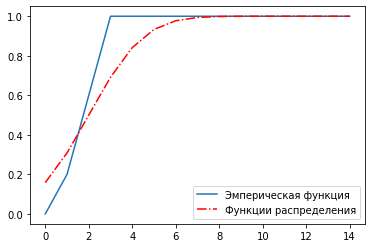

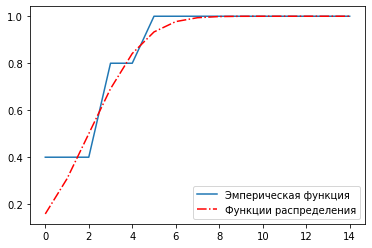

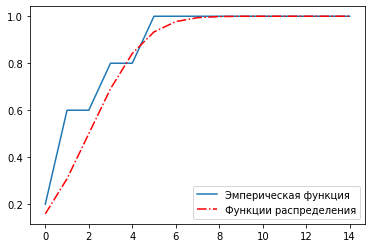

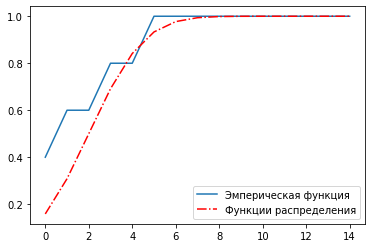

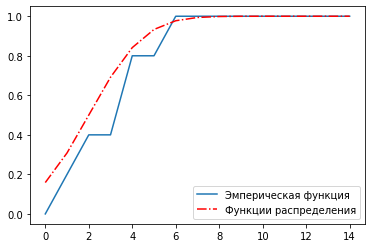

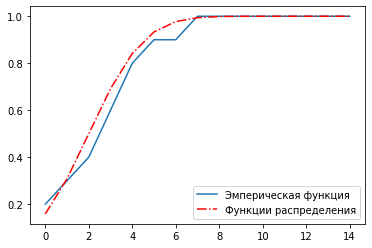

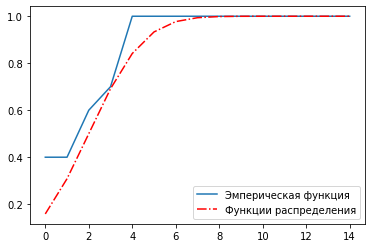

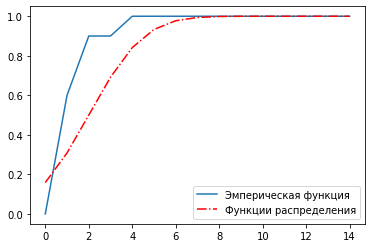

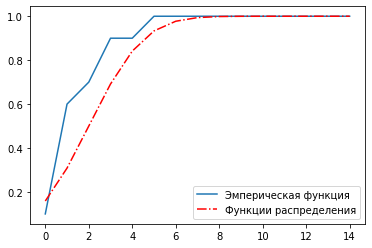

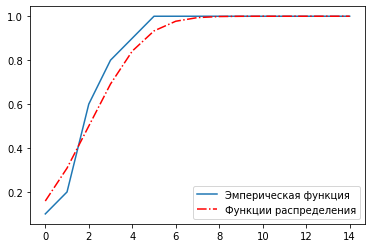

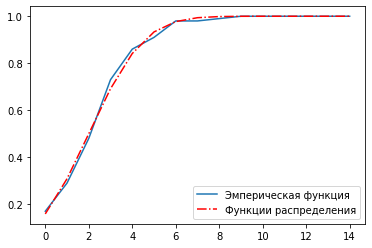

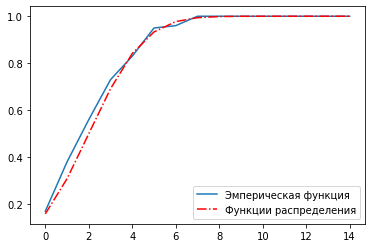

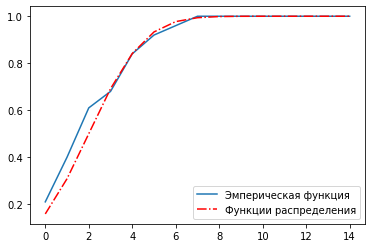

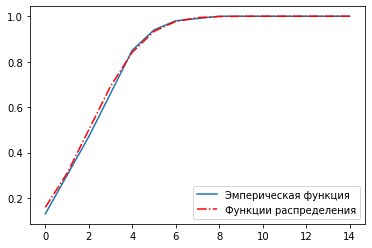

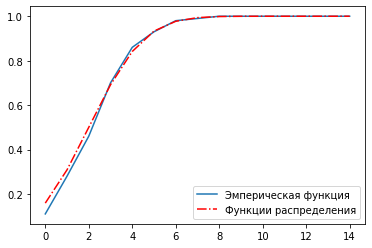

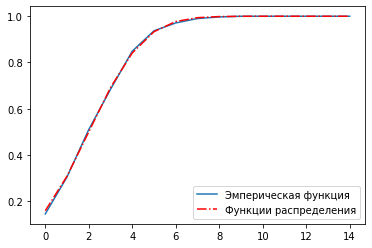

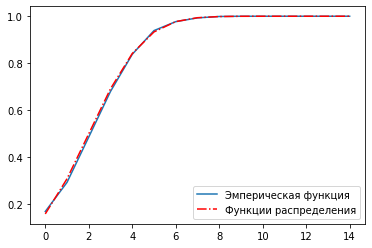

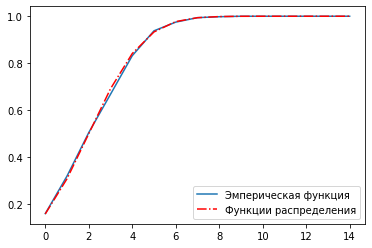

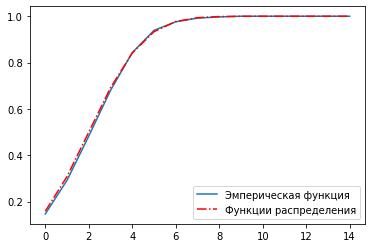

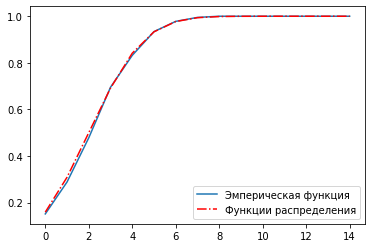

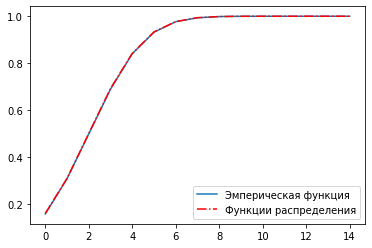

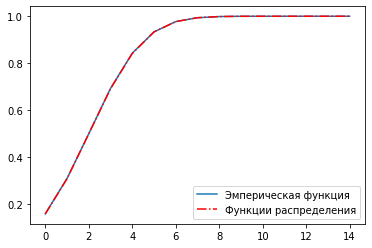

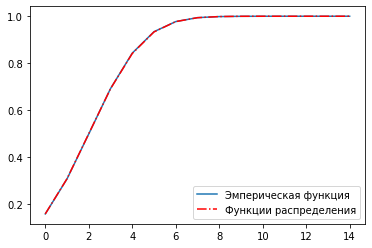

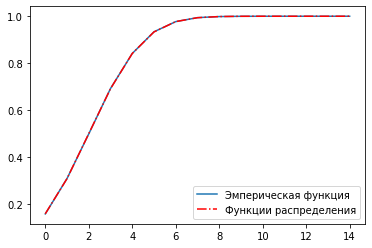

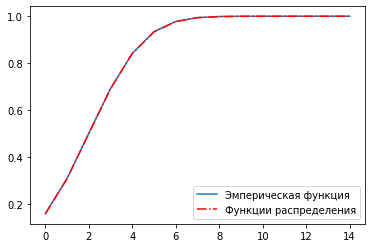

In [233]:
normECDF = []
x = range(15)
for i in normRandom:
    for j in i:
        ecdf = ECDF(j)
        normECDF.append(ecdf(x))
        plt.plot(x, ecdf(x), label='Эмперическая функция')
        plt.plot(x, norm.cdf(x, 2, 2), label='Функции распределения', color = 'r', ls = '-.')
        plt.legend()
        plt.show()
normECDF = np.around(np.array(normECDF).reshape(5, 5, 15), decimals=3)

In [234]:
normSup = []
for n in normECDF:
    for i in range(len(n)-1):
        for j in range(i+1, len(n)):
            normSup.append(max(abs(n[i] - n[j])))
normSup = np.around(np.array(normSup).reshape(5, 10), decimals=3)
print(normSup)

[[0.4  0.4  0.4  0.6  0.2  0.2  0.4  0.2  0.4  0.4 ]
 [0.2  0.5  0.3  0.2  0.4  0.3  0.3  0.2  0.4  0.4 ]
 [0.09 0.13 0.07 0.06 0.05 0.09 0.1  0.14 0.15 0.04]
 [0.02 0.02 0.03 0.03 0.03 0.02 0.02 0.03 0.03 0.01]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]]


## 2.3  Построение вариационного ряда выборк

### 2.3.1  Биномиальное распределение

In [235]:
binVar = []
for n in range(len(binRandom)):
    binVar.append([])
    for array in binRandom[n]:
        uniq = np.unique(array, return_counts=True)
        binVar[n].append(list(zip(uniq[0],uniq[1])))

Вариационный ряд для выборки n=5:
(Первое число в кортеже - значение случайной величины, второе - его частота)

In [236]:
binVar[0]

[[(3, 1), (6, 2), (8, 2)],
 [(2, 1), (5, 1), (6, 2), (8, 1)],
 [(4, 2), (5, 1), (6, 1), (7, 1)],
 [(2, 1), (4, 1), (5, 1), (6, 2)],
 [(0, 1), (4, 1), (5, 2), (7, 1)]]

Вариационный ряд для выборки n=10: 

In [237]:
binVar[1]

[[(3, 1), (4, 1), (5, 2), (6, 2), (7, 2), (8, 2)],
 [(3, 1), (4, 1), (5, 4), (6, 4)],
 [(3, 2), (5, 3), (6, 4), (8, 1)],
 [(1, 1), (3, 1), (4, 4), (5, 1), (6, 2), (7, 1)],
 [(2, 1), (3, 2), (5, 4), (6, 3)]]

Выборочные квантили:

In [248]:
for n in binRandom:
    print(np.quantile(n, [0.2,0.5,0.7], axis=1).T)

[[5.4 6.  7.6]
 [4.4 6.  6. ]
 [4.  5.  5.8]
 [3.6 5.  5.8]
 [3.2 5.  5. ]]
[[4.8 6.  7. ]
 [4.8 5.  6. ]
 [4.6 5.5 6. ]
 [3.8 4.  5.3]
 [3.  5.  5.3]]
[[4.  5.  6. ]
 [4.  5.  6. ]
 [4.  5.  6. ]
 [3.8 5.  6. ]
 [3.  5.  5. ]]
[[4. 5. 6.]
 [4. 5. 6.]
 [4. 5. 6.]
 [4. 5. 6.]
 [4. 5. 6.]]
[[4. 5. 6.]
 [4. 5. 6.]
 [4. 5. 6.]
 [4. 5. 6.]
 [4. 5. 6.]]


Квантили Биномиального распределения:

In [254]:
print(binom.ppf([0.2, 0.5, 0.7], 10, 0.5))  

[4. 5. 6.]


Квантили небольших выборок сильно расходятся с теоретическим результатом, большие же в свою очередь с ним совпадают.

### 2.3.1  Нормальное распределение

In [266]:
normVar = []
for n in range(len(normRandom)):
    normVar.append([])
    for array in normRandom[n]:
        normVar[n].append(np.unique(array))

Вариационный ряд для выборки n=5:

In [270]:
print(*normVar[0], sep='\n')

[0.77 1.31 1.94 2.41 2.78]
[-0.75 -0.01  2.16  2.39  4.83]
[-1.01  0.77  0.83  2.74  4.71]
[-1.71 -0.44  0.02  2.63  4.04]
[0.91 1.76 3.3  3.93 5.22]


Вариационный ряд для выборки n=10: 

In [271]:
print(*normVar[1], sep='\n')

[-2.35 -1.35  0.61  1.41  2.26  2.34  3.38  3.58  4.91  6.06]
[-1.   -0.87 -0.63 -0.25  1.25  1.47  2.23  3.11  3.12  3.36]
[0.14 0.22 0.72 0.77 0.77 0.88 1.8  1.84 1.94 3.12]
[-1.38  0.21  0.31  0.79  0.95  0.97  1.4   2.19  2.8   4.42]
[-0.92  0.72  1.18  1.5   1.71  1.96  2.47  2.73  3.93  4.73]


Выборочные квантили:

In [272]:
for n in normRandom:
    print(np.quantile(n, [0.2,0.5,0.7], axis=1).T)

[[ 1.2   1.94  2.32]
 [-0.16  2.16  2.34]
 [ 0.41  0.83  2.36]
 [-0.7   0.02  2.11]
 [ 1.59  3.3   3.8 ]]
[[ 0.22  2.3   3.44]
 [-0.68  1.36  2.5 ]
 [ 0.62  0.83  1.81]
 [ 0.29  0.96  1.64]
 [ 1.09  1.83  2.55]]
[[ 0.29  2.07  2.92]
 [ 0.36  1.75  2.8 ]
 [-0.22  1.37  3.17]
 [ 0.53  2.05  3.06]
 [ 0.63  2.24  2.97]]
[[0.4  1.94 3.08]
 [0.28 2.1  3.1 ]
 [0.23 1.96 3.15]
 [0.32 2.08 3.09]
 [0.42 2.1  3.06]]
[[0.33 2.01 3.06]
 [0.31 2.   3.04]
 [0.32 2.   3.04]
 [0.32 2.01 3.05]
 [0.31 1.99 3.05]]


Квантили Нормального распределения:

In [273]:
print(norm.ppf([0.2, 0.5, 0.7], 2, 2))  

[0.32 2.   3.05]


Квантили небольших выборок сильно расходятся с теоретическим результатом, большие же в свою очередь с ним почти совпадают.

## 2.4   Построение гистограммы и полигон частот

Биномиальное распределение:

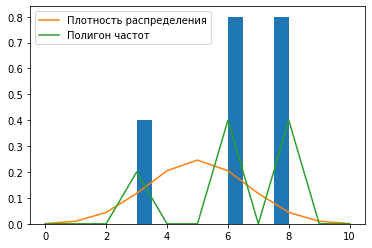

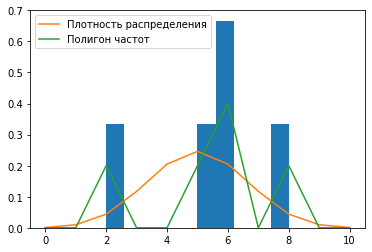

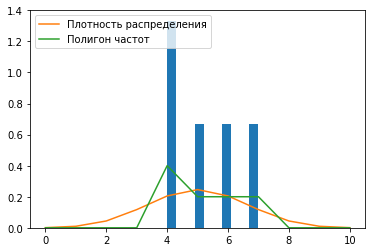

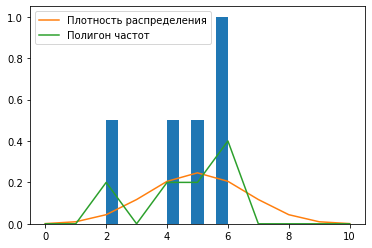

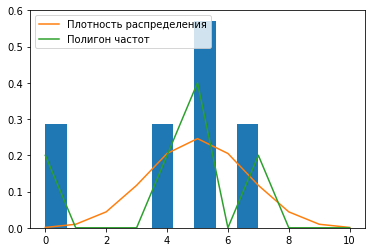

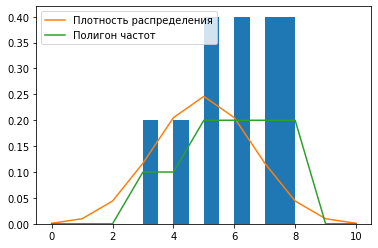

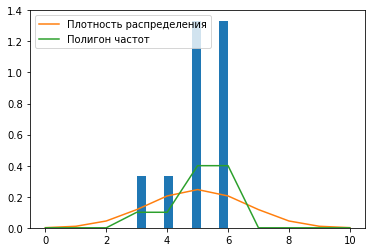

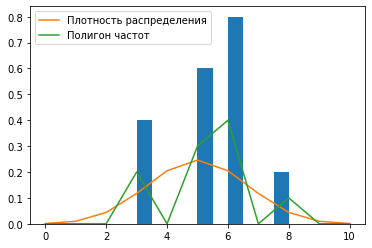

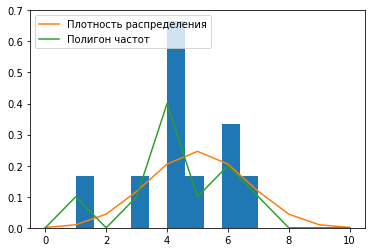

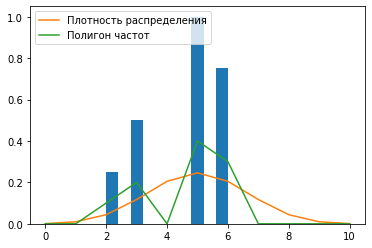

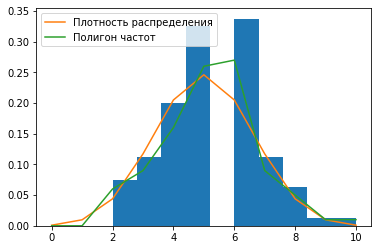

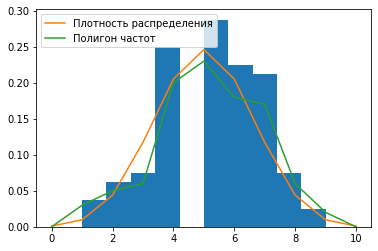

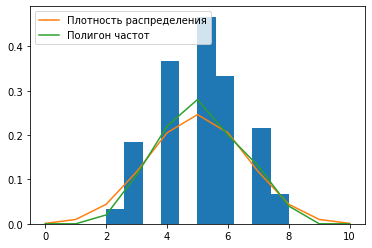

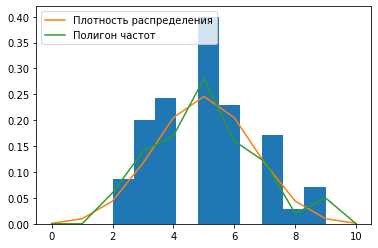

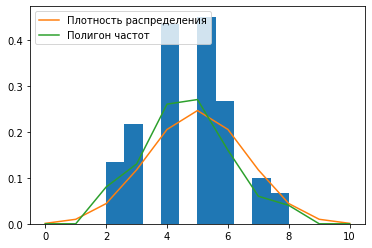

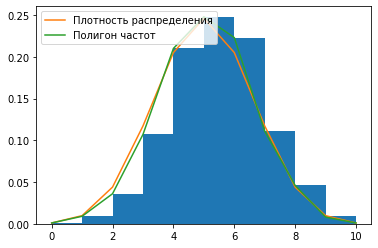

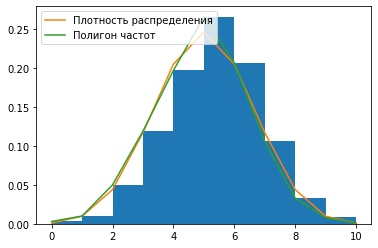

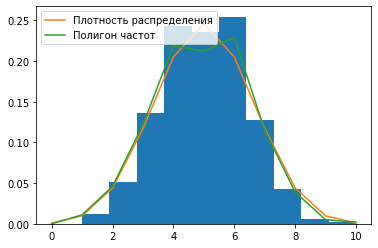

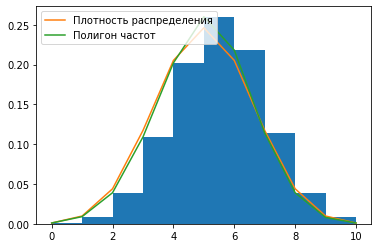

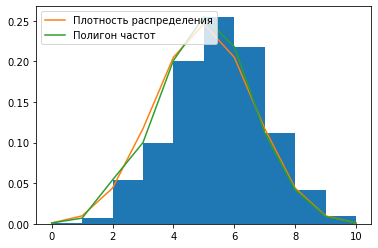

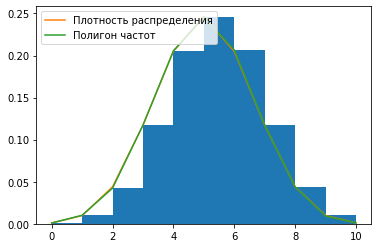

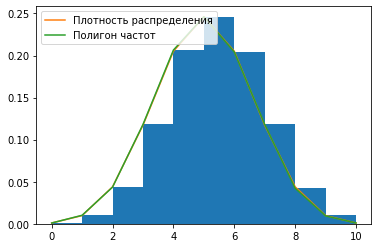

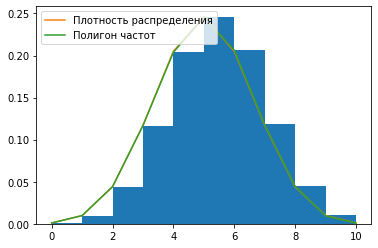

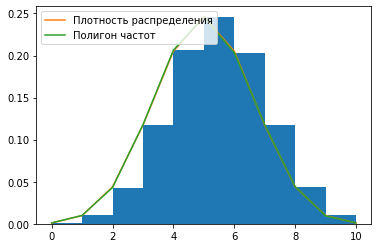

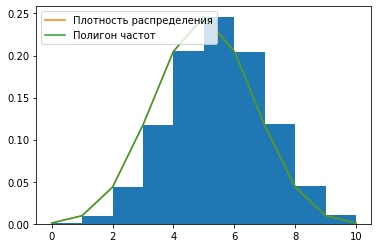

In [319]:
for i in range(len(binRandom)):
    for j in range(len(binRandom[i])):
        freq = [0 for i in range(11)]
        for k in binVar[i][j]:
            freq[k[0]]=k[1]/size[i]
        plt.hist(binRandom[i][j],  density=True)
        plt.plot(range(0, 11), binom.pmf(range(0, 11), 10, 0.5), label='Плотность распределения')
        plt.plot(range(11), freq, label='Полигон частот' )
        plt.legend(loc='upper left')
        plt.show()

Нормальное распределение:

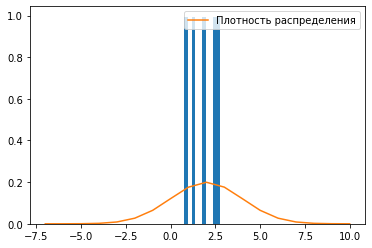

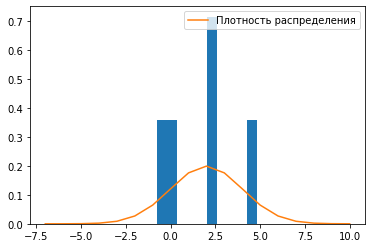

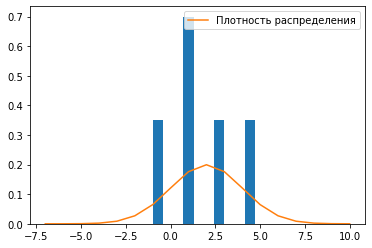

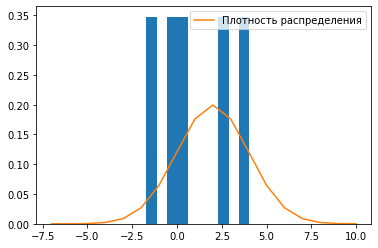

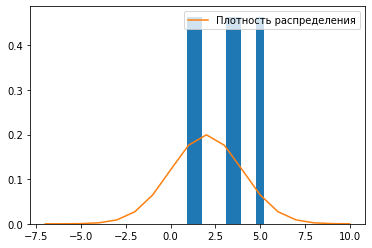

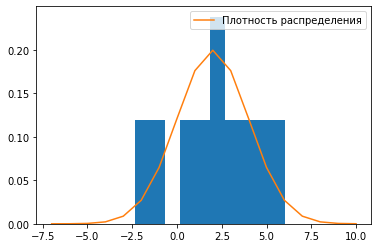

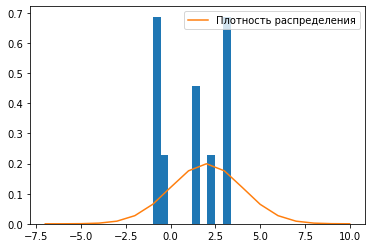

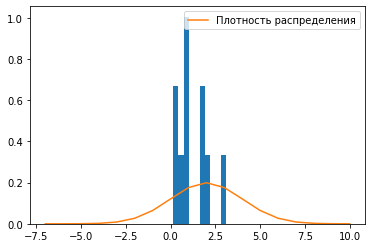

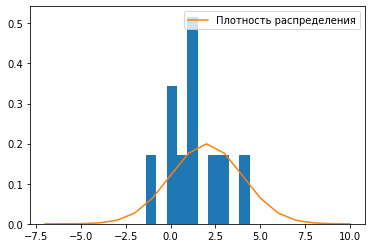

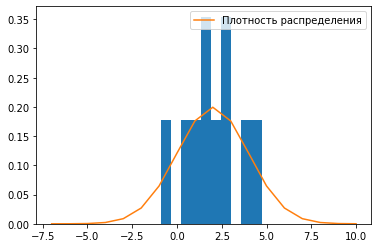

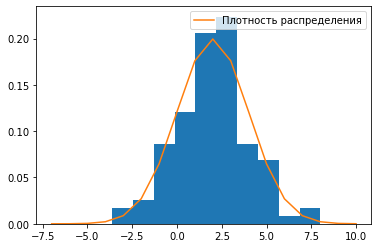

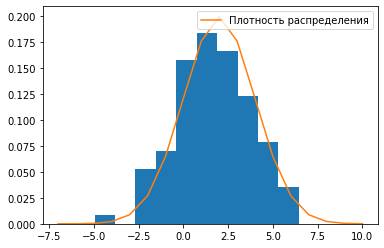

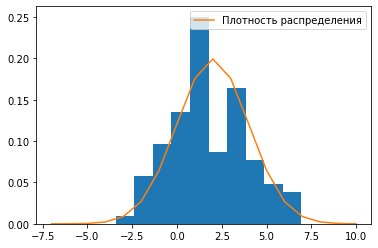

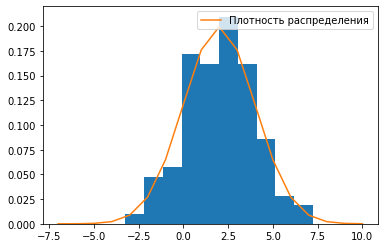

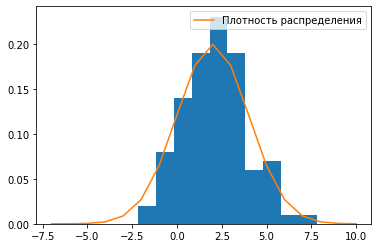

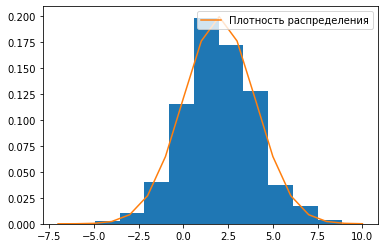

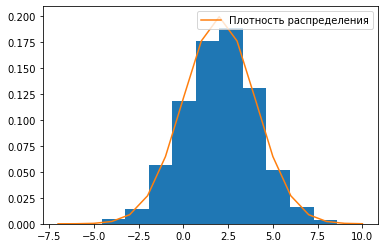

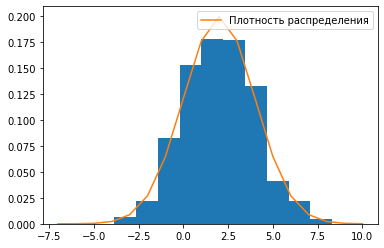

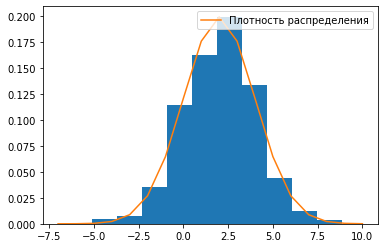

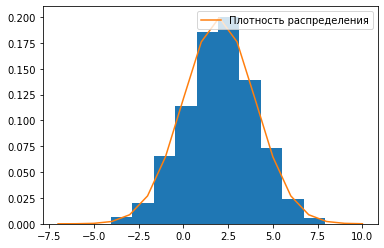

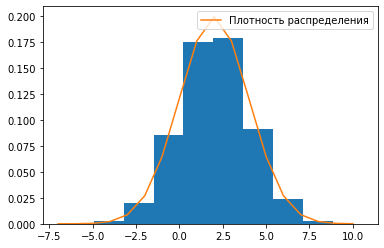

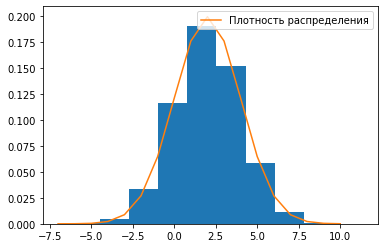

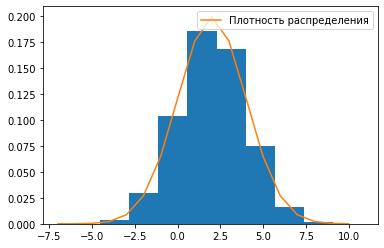

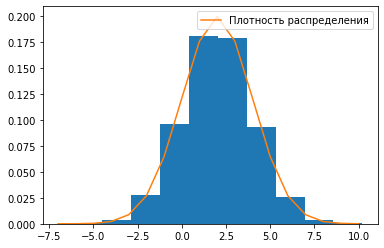

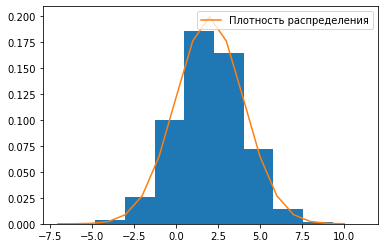

In [326]:
for i in range(len(normRandom)):
    for j in range(len(normRandom[i])):
        plt.hist(normRandom[i][j],  density=True)
        plt.plot(range(-7, 11), norm.pdf(range(-7, 11), 2, 2), label='Плотность распределения')
        plt.legend(loc='upper right')
        plt.show()